# Análisis de componentes principales

El análisis de componentes principales (PCA) es un procedimiento estadístico que utiliza una transformación ortogonal para convertir un conjunto de observaciones de variables posiblemente correlacionadas (entidades cada una de las cuales toma varios valores numéricos) en un conjunto de valores de variables linealmente no correlacionadas llamadas componentes principales. Esta transformación se define de tal manera que el primer componente principal tiene la mayor varianza posible (es decir, representa la mayor parte de la variabilidad en los datos como sea posible), y cada componente sucesivo a su vez tiene la mayor varianza posible bajo la restricción que es ortogonal a los componentes anteriores. Los vectores resultantes (cada uno es una combinación lineal de las variables y contiene n observaciones) son un conjunto de bases ortogonales no correlacionadas. PCA es sensible al escalado relativo de las variables originales.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

## Reducir X a 3 dimensiones con PCA

In [16]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
X.shape

(150, 3)

[]

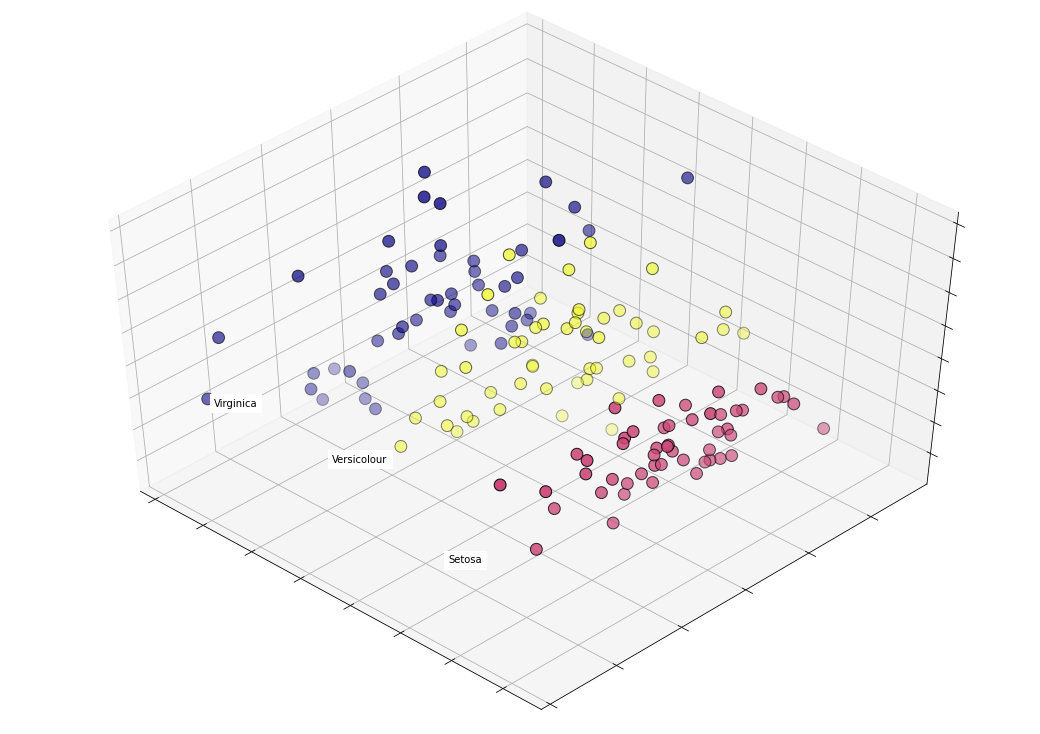

In [17]:
from mpl_toolkits.mplot3d import Axes3D

centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(15, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(edgecolor='w', facecolor='w'))
    
# reordenar las etiquetas para que haga match con los clusters
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='plasma',
           edgecolor='k', s=140)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [18]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

Text(0, 0.5, 'Varianza Explicada')

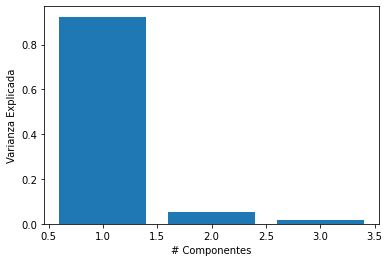

In [27]:
plt.bar([1,2,3],pca.explained_variance_ratio_)
plt.xlabel('# Componentes')
plt.ylabel('Varianza Explicada')